In [2]:
# Build a ping percentile plot

import matplotlib.pyplot as plt
from numpy import percentile
from csv import reader
import math

In [3]:
data = {}

with open("../aws/ping/ping.csv") as f:
    rdr = reader(f)
    for row in rdr:
        msg = int(row[0])
        percen = float(row[1])
        ping = float(row[2])
        if msg not in data:
            data[msg] = {}
            data[msg]["x"] = [percen]
            data[msg]["y"] = [math.log(ping)]
        else:
            data[msg]["x"].append(percen)
            data[msg]["y"].append(math.log(ping))


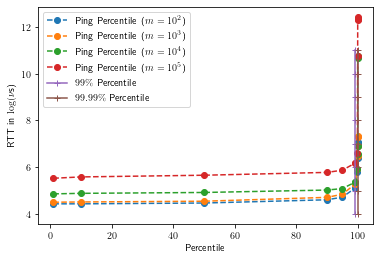

In [4]:
plt.rc('text',usetex=True)

for i in data.keys():
    x = data[i]["x"]
    y = data[i]["y"]
    plt.plot(x,y, label=f"Ping Percentile ($m=10^{int(math.log10(i))}$)", linestyle='--', marker='o')
plt.plot([99]*8, [i for i in range(4,12)], marker='+',label="$99\%$ Percentile")
plt.plot([99.99]*8, [i for i in range(4,12)], marker='+',label="$99.99\%$ Percentile")
plt.legend()
plt.xlabel("Percentile")
plt.ylabel("RTT in $\log(\\nu$s)")
# plt.show()
# plt.xticks(log_points)
plt.savefig("Ping-AWS.pdf")